In [35]:
import os
import similaritymeasures
import numpy as np
import cv2
from matplotlib import pyplot as plt

import seaborn as sns

import pandas as pd

In [67]:
def get_scores(val_data_path, val_run_path, save_loc):
    os.makedirs(save_loc,exist_ok=True)
    frechet_dists = []
    euclidean_dists = []
    for episode in range(25):
        episode = str(episode)
        filename = os.path.join(val_run_path,episode,'vehicle_positions.txt')
        with open(filename,'r') as f:
            positions = f.readlines()
        run_traj = np.array([ [ float(t.strip()) for t in x.strip().split(',')] for x in positions])

        filename = os.path.join(val_data_path,episode,'vehicle_positions.txt')
        with open(filename,'r') as f:
            positions = f.readlines()
        data_traj = np.array([ [ float(t.strip()) for t in x.strip().split(',')] for x in positions])

        filename = os.path.join(val_run_path,episode,'command.txt')
        with open(filename,'r') as f:
            command = f.readline().strip()

        plt.plot(data_traj[:,0],data_traj[:,1],label='Ground Truth')
        plt.plot(run_traj[:,0],run_traj[:,1],label='Inference on Prediction')
        plt.scatter(data_traj[-1,0],data_traj[-1,1],s=100,label='Ground Truth - End Point')
        plt.scatter(run_traj[-1,0],run_traj[-1,1],s=100,label='Inference - End Point')
        plt.scatter(data_traj[0,0],data_traj[0,1],s=100,label='Starting Point')

        x_min = np.min(np.hstack([data_traj[:,0],run_traj[:,0]]))
        y_min = np.min(np.hstack([data_traj[:,1],run_traj[:,1]]))

        x_max = np.max(np.hstack([data_traj[:,0],run_traj[:,0]]))
        y_max = np.max(np.hstack([data_traj[:,1],run_traj[:,1]]))

        frechet_dists.append(similaritymeasures.frechet_dist(run_traj,data_traj))

        euclidean_dists.append(similaritymeasures.distance.euclidean(data_traj[-1,:],run_traj[-1,:]))

        plt.xlim(x_min-5, x_max+5)
        plt.ylim(y_min-5, y_max+5)
        plt.gca().invert_xaxis()
        plt.axis('off')
        plt.title(command)

        plt.legend()
        print(f'Episode {episode}: {command}')
        print(f'Frechet Distance: {frechet_dists[-1]}')
        print(f'Euclidean Distance between End Points: {euclidean_dists[-1]}')
    #     print(f'Curve Length Measure: {cl_measures[-1]}')
        plt.savefig(os.path.join(save_loc,episode)+'.png')    
        plt.show()
    return frechet_dists, euclidean_dists

In [ ]:
! scp varunc@ada:~/share3/varunc/val_runs.zip /ssd_scratch/cvit/varunc
! scp varunc@ada:~/share3/varunc/val_runs_baseline.zip /ssd_scratch/cvit/varunc

Episode 0: park near the bus stand
Frechet Distance: 8.067973423453093
Euclidean Distance between End Points: 8.067973423453093


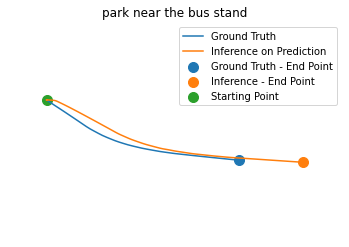

Episode 1: stop near the tallest building
Frechet Distance: 53.00581683992712
Euclidean Distance between End Points: 53.005816839927114


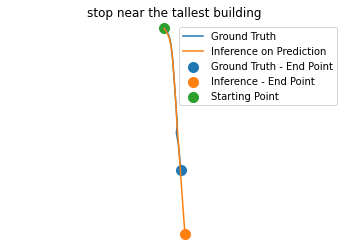

Episode 2: Take a right from the intersection
Frechet Distance: 17.871254623761335
Euclidean Distance between End Points: 17.871254623761335


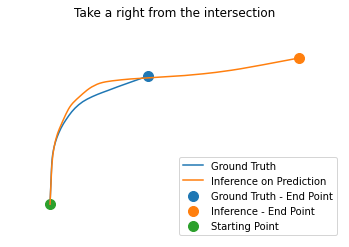

Episode 3: go right from the corner
Frechet Distance: 5.424230403686319
Euclidean Distance between End Points: 5.424230403686319


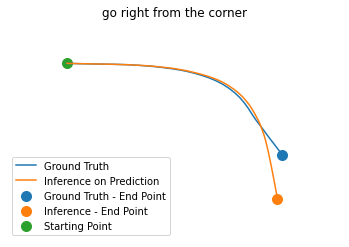

Episode 4: Drive towards the bus stop
Frechet Distance: 5.883544924222516
Euclidean Distance between End Points: 5.883544924222516


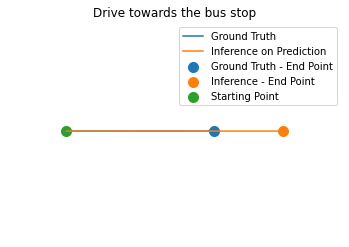

Episode 5: take a left from the intersection
Frechet Distance: 4.207446052814155
Euclidean Distance between End Points: 4.207446052814155


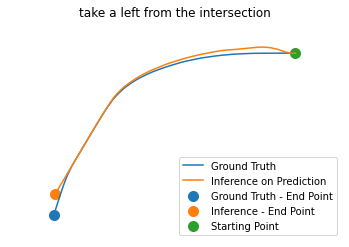

Episode 6: take a right and stop near the pedestrian
Frechet Distance: 37.17586127416498
Euclidean Distance between End Points: 37.17586127416498


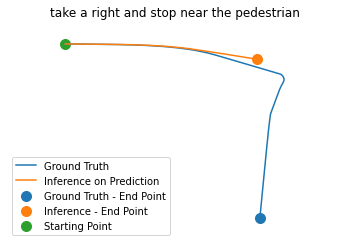

Episode 7: stop beside the blue car
Frechet Distance: 10.09984141678516
Euclidean Distance between End Points: 10.09984141678516


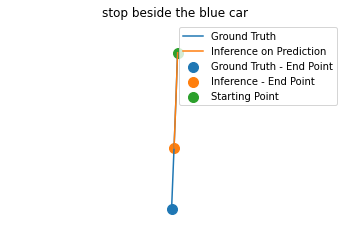

Episode 8: wait for the signal to turn green and then go straight
Frechet Distance: 10.352713689506274
Euclidean Distance between End Points: 10.352713689506274


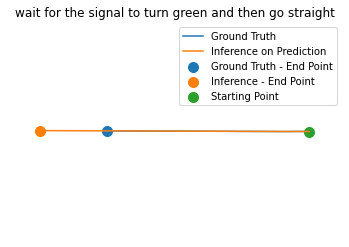

Episode 9: Go straight from the intersection and stop next to the bus stop.
Frechet Distance: 17.818345388514963
Euclidean Distance between End Points: 17.818345388514963


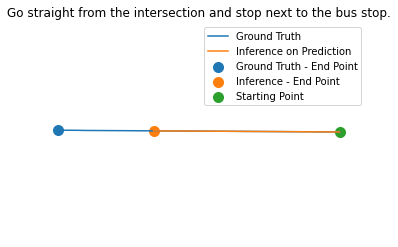

Episode 10: Go straight and park behind the first car you see
Frechet Distance: 9.51998711581825
Euclidean Distance between End Points: 9.51998711581825


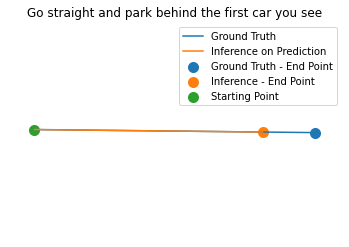

Episode 11: stop by the lamp pole
Frechet Distance: 14.914040665385825
Euclidean Distance between End Points: 14.914040665385825


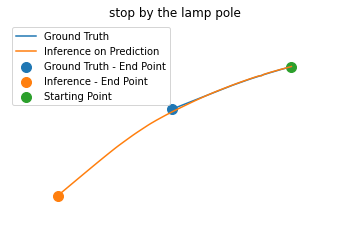

Episode 12: stop across the house with stairs
Frechet Distance: 12.079165110970228
Euclidean Distance between End Points: 12.079165110970228


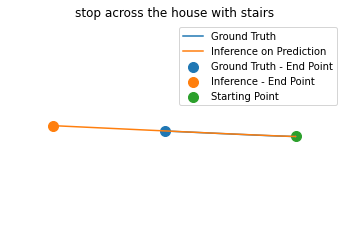

Episode 13: stop in front of the maroon car in the rightmost lane
Frechet Distance: 15.04982720957462
Euclidean Distance between End Points: 15.04982720957462


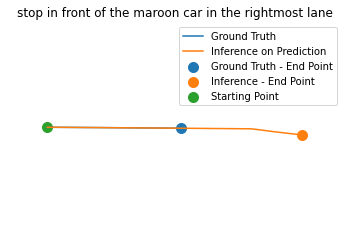

Episode 14: Go right from the corner
Frechet Distance: 13.981770864218579
Euclidean Distance between End Points: 13.981770864218579


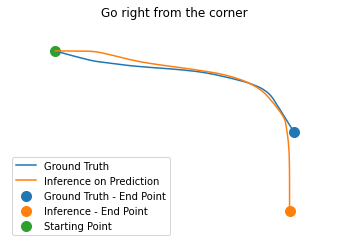

Episode 15: park behind the brown car
Frechet Distance: 29.106283996023823
Euclidean Distance between End Points: 29.106283996023823


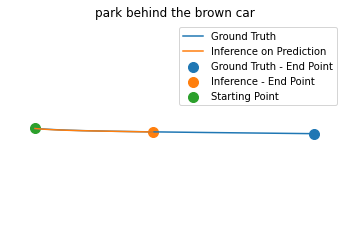

Episode 16: take a right and stop near the pedestrian
Frechet Distance: 65.61630701945079
Euclidean Distance between End Points: 65.61630701945079


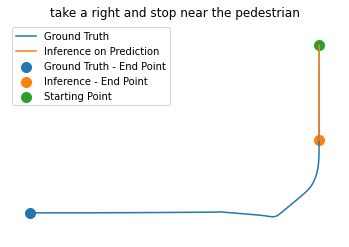

Episode 17: take a right at the intersection
Frechet Distance: 20.762823002626956
Euclidean Distance between End Points: 20.76282300262696


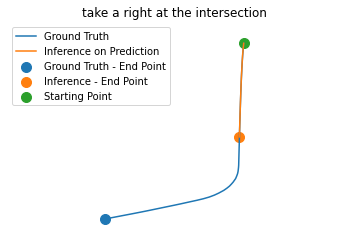

Episode 18: take a right at the traffic lights and then take left
Frechet Distance: 63.527856365659964
Euclidean Distance between End Points: 45.156935943449724


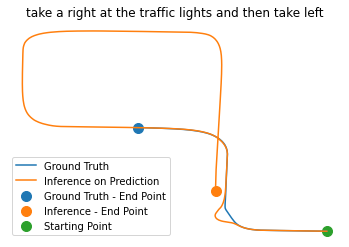

Episode 19: take the road on the left
Frechet Distance: 2.7103160049226553
Euclidean Distance between End Points: 2.7103160049226553


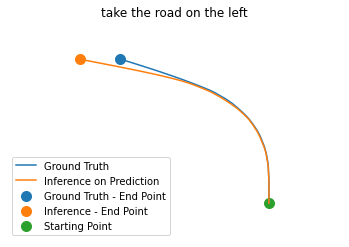

Episode 20: wait for traffic light then take left
Frechet Distance: 53.95504227361281
Euclidean Distance between End Points: 53.95504227361281


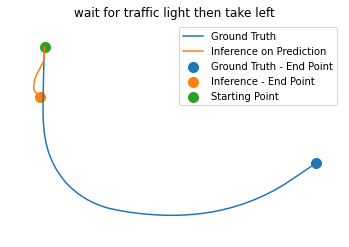

Episode 21: stop as soon as you encounter a white car
Frechet Distance: 0.368214965962211
Euclidean Distance between End Points: 0.36821496596221104


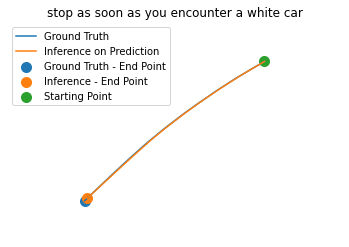

Episode 22: Stop near the blue dustbin which you see in front
Frechet Distance: 8.532989562777306
Euclidean Distance between End Points: 8.532989562777306


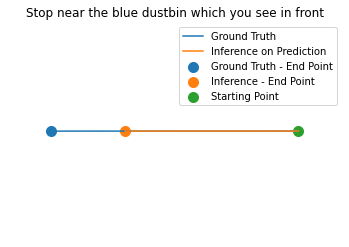

Episode 23: wait for the green signal then take a left from the intersection
Frechet Distance: 2.642106887648068
Euclidean Distance between End Points: 0.4621645707569786


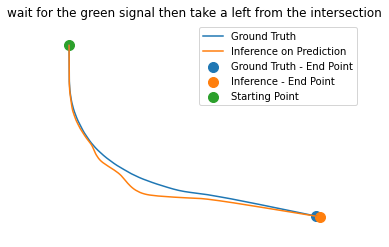

Episode 24: stop in front of the white car
Frechet Distance: 26.52107739333949
Euclidean Distance between End Points: 26.521077393339485


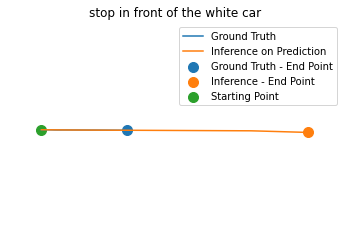

In [68]:
val_data_path = '/ssd_scratch/cvit/varunc/carla_data/val/'
val_run_path = '/ssd_scratch/cvit/varunc/val_runs/'
save_loc = '../trajectories/'

f,e = get_scores(val_data_path, val_run_path, save_loc)

Episode 0: park near the bus stand
Frechet Distance: 7.800990411627128
Euclidean Distance between End Points: 7.800990411627128
Episode 1: stop near the tallest building
Frechet Distance: 103.71988341750551
Euclidean Distance between End Points: 103.71988341750551
Episode 2: Take a right from the intersection
Frechet Distance: 0.5599468576841995
Euclidean Distance between End Points: 0.5599468576841995
Episode 3: Go right from the corner
Frechet Distance: 15.351474907299222
Euclidean Distance between End Points: 15.351474907299224
Episode 4: Drive towards the bus stop
Frechet Distance: 3.8777465886176747
Euclidean Distance between End Points: 3.8777465886176743
Episode 5: Take a left from the interection.
Frechet Distance: 184.49712597329608
Euclidean Distance between End Points: 89.05637743971764
Episode 6: take a right and stop near the pedestrian
Frechet Distance: 14.05976950699146
Euclidean Distance between End Points: 14.05976950699146
Episode 7: stop beside the black suv
Frechet 

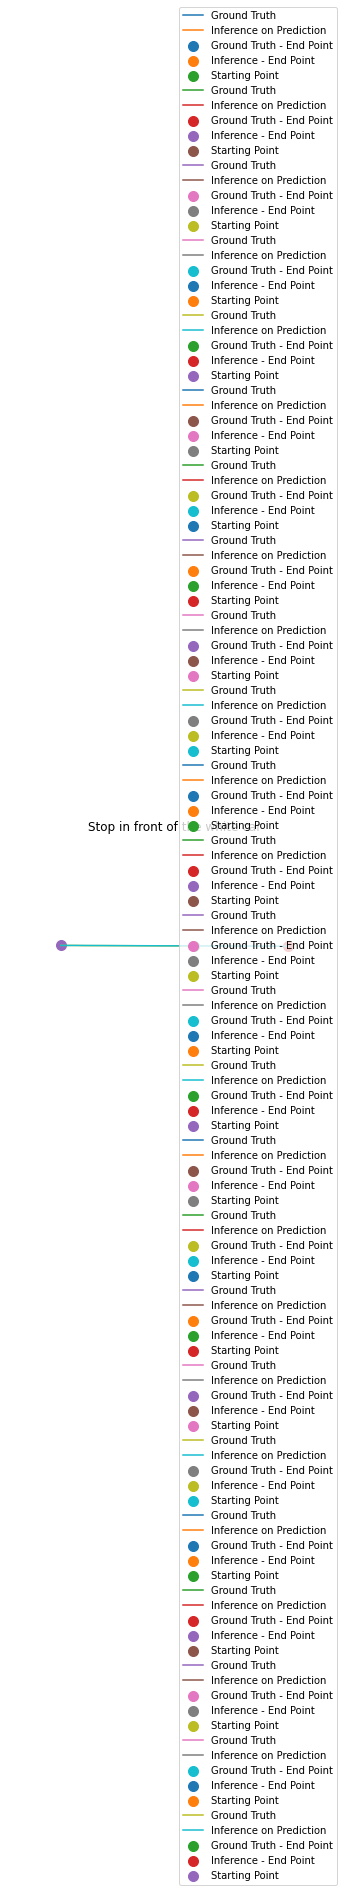

In [63]:
val_data_path = '/ssd_scratch/cvit/varunc/carla_data/val/'
val_run_path = '/ssd_scratch/cvit/varunc/val_run_baseline/'
save_loc = '../trajectories_baseline/'

f_bl,e_bl = get_scores(val_data_path, val_run_path, save_loc)

In [64]:
f_df = pd.DataFrame({'Cross Attention':f,'Concatenation':f_bl})
e_df = pd.DataFrame({'Cross Attention':e,'Concatenation':e_bl})

Text(0.5, 1.0, 'Freschet Distance')

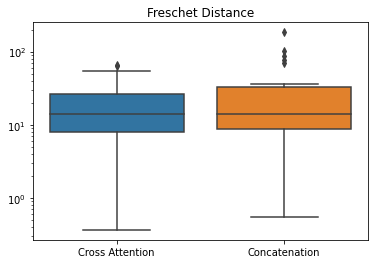

In [65]:
g = sns.boxplot(data=f_df)
g.set_yscale("log")
plt.title('Freschet Distance')

Text(0.5, 1.0, 'Euclidean Distance Between End Points')

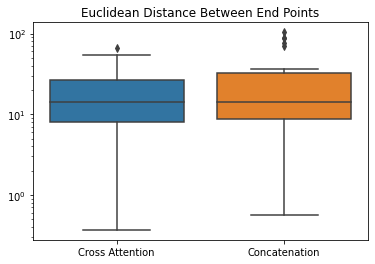

In [66]:
g = sns.boxplot(data=e_df)
g.set_yscale("log")
plt.title('Euclidean Distance Between End Points')